<a href="https://colab.research.google.com/github/aasim-syed/New-2/blob/master/tesla-stockmarket-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Tesla.csv - Tesla.csv.csv to Tesla.csv - Tesla.csv.csv


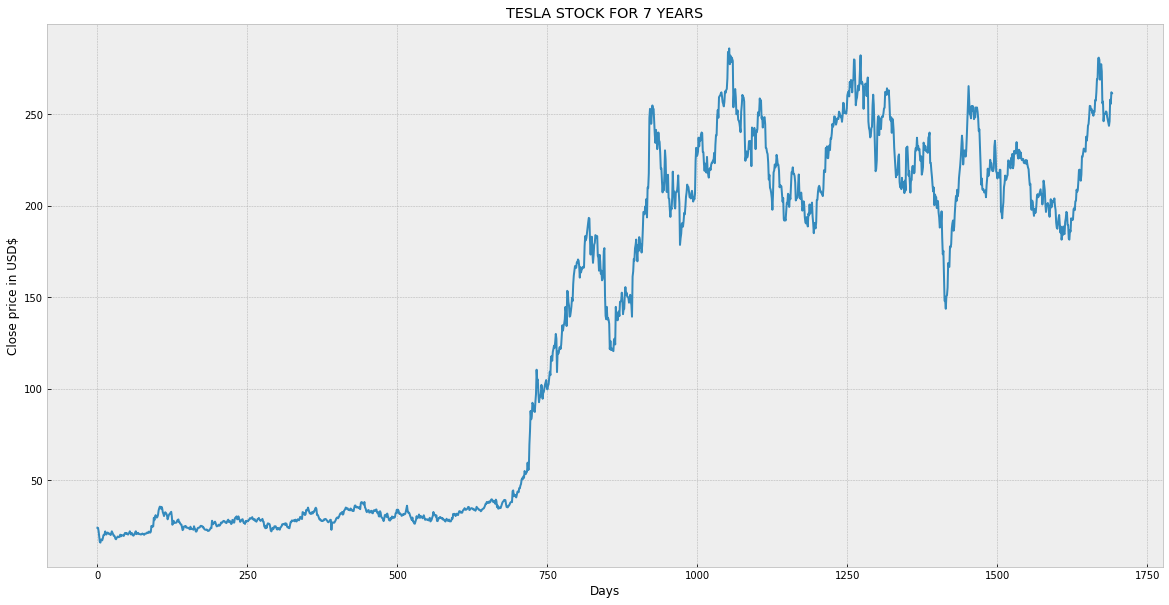

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [251.929993]
 [249.240005]
 [251.550003]]
[ 17.9       17.6       18.32     ... 255.729996 262.049988 261.5     ]
[251.330002  257.769989  223.8200075 231.990005  269.200012  269.230011
 280.600006  280.980011  188.070007  268.950012  272.230011  277.390015
 273.51001   255.990005  198.2150035 238.520004  249.990005  250.020004
 250.479996  251.570007  251.210007  248.589996  219.580002  244.899994
 243.690002  246.169998  253.009995  232.339996  227.820007  261.5      ]



In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Tesla.csv - Tesla.csv.csv')
df.head(4)

plt.figure(figsize=(20,10))
plt.title('TESLA STOCK FOR 7 YEARS')
plt.xlabel('Days')
plt.ylabel('Close price in USD$')
plt.plot(df['Close'])
plt.show()

df = df[['Close']]
df.head(4)

future_days = 30
df['Predictions'] = df[['Close']].shift(-future_days)
df.head(4)

X = np.array(df.drop(['Predictions'], 1))[:-future_days]
print(X)

y = np.array(df['Predictions'])[:-future_days]
print(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)





In [2]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [3]:
x_future = df.drop(['Predictions'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[208.789993],
       [207.699997],
       [208.449997],
       [213.339996],
       [219.529999],
       [219.740005],
       [214.679993],
       [213.690002],
       [216.990005],
       [226.990005],
       [226.75    ],
       [229.009995],
       [231.279999],
       [229.869995],
       [229.729996],
       [229.589996],
       [237.75    ],
       [235.580002],
       [238.360001],
       [243.759995],
       [244.729996],
       [248.919998],
       [254.610001],
       [254.470001],
       [252.509995],
       [252.949997],
       [250.630005],
       [251.929993],
       [249.240005],
       [251.550003]])

In [4]:


tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()


[251.330002  257.769989  223.8200075 231.990005  269.200012  269.230011
 280.600006  280.980011  188.070007  268.950012  272.230011  277.390015
 273.51001   255.990005  198.2150035 238.520004  249.990005  250.020004
 250.479996  251.570007  251.210007  248.589996  219.580002  244.899994
 243.690002  246.169998  253.009995  232.339996  227.820007  261.5      ]



In [13]:
df = df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


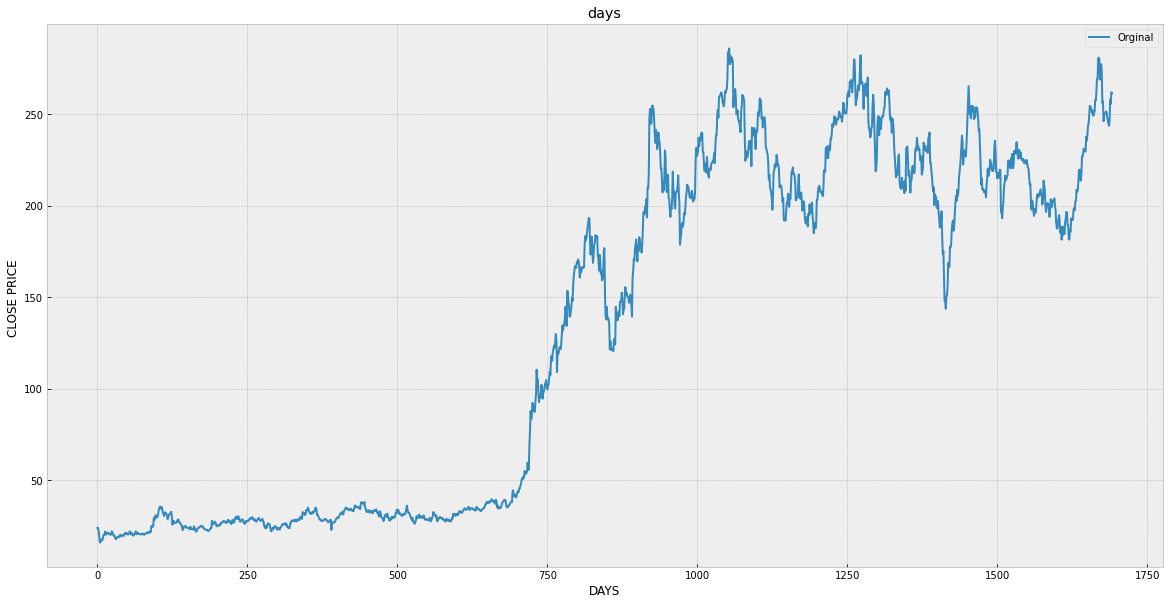

In [19]:
Predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = Predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.title('days')
plt.xlabel('DAYS')
plt.ylabel('CLOSE PRICE ')
plt.plot(df['Close'])
plt.legend(['Orginal', 'Val' ,'Pre'])
plt.show()
